In [1]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.manifold import TSNE

In [2]:
strategy=pd.read_csv('FCM_Problems_and_Strategies_with_labels0730.csv')

In [3]:
problem=pd.read_csv('Problems_and_Strategies_with_labels.csv')
problem=problem.loc[:,['ID','Problem','Problem_Label']]
problem['Strategy']=strategy['Strategy']
problem['Strategy_Label']=strategy['Strategy_Label']
full=problem
full.shape

(4039, 5)

In [4]:
full.head()

,ID,Problem,Problem_Label,Strategy,Strategy_Label
0,77th 1-16-40-2,wants to expunge her record,Emotional/behavior issues,cm will contact past employers with client to ...,Mentorship for school/job readiness
1,77th 1-16-45-1,needs a job client is a foster kid and her fos...,Emotional/behavior issues,speak to teacher about mother and refer client...,Mentorship for school/job readiness
2,77th 1-16-47-2,has poor grades and want to get better grades,Emotional/behavior issues,cm will work on getting tutoring services alon...,Mentorship for school/job readiness
3,77th 1-16-50-2,client don't believe in herself,Emotional/behavior issues,to mentor client with basic life skills and se...,Substance abuse/Anger management/Life skill class
4,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotional/behavior issues,referred him to in-house services through sea ...,Mentorship for school/job readiness


In [5]:
score=pd.read_csv('full_embeddedness.csv')

In [6]:
df = pd.merge(left=full, right=score, left_on='ID', right_on='ID',how='inner')
df=df.drop_duplicates()

In [13]:
df.loc[df['Problem_Label'] == 'Need assistance with school enrollment/improving school grades', 'Problem_Label'] = 'school-related issues'

In [15]:
df.loc[df['Problem_Label'] == 'Need to complete community service hours for probation requirements', 'Problem_Label'] = 'probation-related issues'

In [30]:
df.loc[df['Problem_Label'] == 'Need work ready documents/California id', 'Problem_Label'] = 'Lack work documents/CA ID'

In [32]:
df.loc[df['Problem_Label'] == 'Need assistance with employment search', 'Problem_Label'] = 'employment-related issues'

In [38]:
df.loc[df['Problem_Label'] == 'Need mentoring from CM/CIW to navagate interpersonal relationships', 'Problem_Label'] = 'interpersonal relationship issues'

Text(0.5, 1.0, 'Problem vs Score')

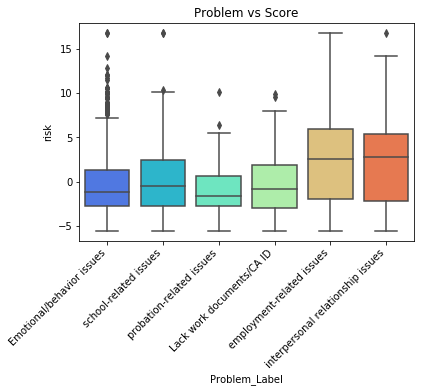

In [39]:
ch=sns.boxplot(x='Problem_Label',y='risk',data=df,palette='rainbow')
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Problem vs Score')


In [ ]:
df.loc[df['Problem_Label'] == 'Need mentoring from CM/CIW to navagate interpersonal relationships', 'Problem_Label'] = 'interpersonal relationship issues'

Text(0.5, 1.0, 'Strategy vs Score')

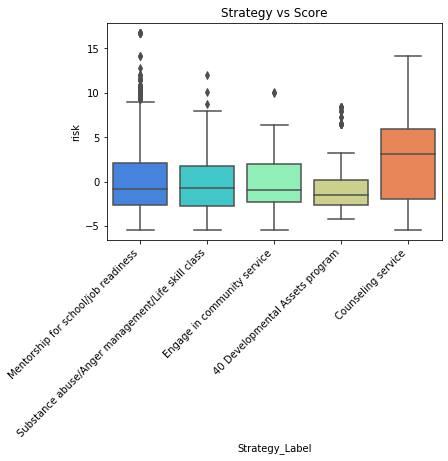

In [40]:
ch=sns.boxplot(x='Strategy_Label',y='risk',data=df,palette='rainbow')
ch.set_xticklabels(ch.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Strategy vs Score')

In [10]:
df.to_csv('problem,strategy.csv', index = False)

In [11]:
df.shape

(3058, 13)

In [12]:
df

,ID,Problem,Problem_Label,Strategy,Strategy_Label,admin,age,sex,zone,gang,family,other,risk
0,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotional/behavior issues,referred him to in-house services through sea ...,Mentorship for school/job readiness,1,17.0,1,1.0,-0.014132,-1.606012,-0.178780,2.276122
1,77th 1-16-64-1,client has a lot of issues he is a foster kid ...,Emotional/behavior issues,referred him to in-house services through sea ...,Mentorship for school/job readiness,2,17.0,1,1.0,-1.619353,-0.649773,0.524949,-1.745610
2,77th 1-16-81-1,low self esteem,Emotional/behavior issues,life skills- self love,Substance abuse/Anger management/Life skill class,1,18.0,2,1.0,0.564769,1.581231,NaN,-0.432885
3,77th 1-16-81-1,low self esteem,Emotional/behavior issues,life skills- self love,Substance abuse/Anger management/Life skill class,2,18.0,2,1.0,-2.870912,-0.007304,-1.015941,-2.667042
4,77th 1-16-95-1,client has girl drama at school with gossiping...,Emotional/behavior issues,one on one anger management skills,Substance abuse/Anger management/Life skill class,1,17.0,2,1.0,1.874593,-1.282688,NaN,2.209041
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,Southwest 2-23-277-1,client is currently on probation.,Emotional/behavior issues,cm developed a plan that client is to attend a...,Mentorship for school/job readiness,1,18.0,1,23.0,NaN,-1.701536,NaN,0.870485
3060,Southwest 2-23-278-1,client is currently on probation.,Emotional/behavior issues,cm has developed a plan for client to attend a...,Mentorship for school/job readiness,1,15.0,1,23.0,NaN,-3.189209,NaN,0.674581
3061,Southwest 2-23-279-1,client is currently on probation.,Emotional/behavior issues,cm will conducted workshops needed for client ...,Mentorship for school/job readiness,1,18.0,2,23.0,NaN,-0.818635,NaN,2.572766
3062,Southwest 2-23-280-1,client is currently on probation.,Emotional/behavior issues,cm will provide client with substance abuse wo...,Substance abuse/Anger management/Life skill class,1,15.0,2,23.0,NaN,-1.823371,NaN,-2.667042
